In [1]:
#Init variabelen

%config IPCompleter.greedy = True  
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

from seaborn import countplot
from matplotlib.pyplot import figure, show

from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models import FactorRange, ColumnDataSource, TableColumn, DataTable, CustomJS, Legend, Range1d
from bokeh.models.widgets import Panel, Tabs, Select, CheckboxGroup
from bokeh.server.server import Server
from bokeh.application import Application
from bokeh.application.handlers.function import FunctionHandler
from bokeh.io import output_file, show
from bokeh.layouts import column, row, WidgetBox  
from bokeh.core.properties import value 

### toegevoegd door DB:

host = "mysql.nm-interactive.net"
port = 3306
user = "windesheim"
password = "pMjq357Kdee7Sx8C"
database = "windesheim"
client = "mysql"

#Installeer eerst Mysqlcient in Anaconda Navigator
engine = create_engine("{0}://{1}:{2}@{3}:{4}/{5}".format(client, user, password, host, port, database))
#Data ophalen uit de SQL database
datasource = pd.read_sql_query("SELECT * FROM source WHERE KWALIFICATIENIVEAU = 4",engine)
wervingsgebieden = pd.read_sql_query("SELECT * FROM wervingsgebieden",engine)

In [2]:
### toegevoegd door DB:
# Functie voor het checken van de locatie
def check_locatie(PostCode):
    test = wervingsgebieden.loc[(wervingsgebieden.PostcodeStart <= PostCode) & (wervingsgebieden.PostcodeEind >= PostCode), ['Locatie']]

    if test.empty:
        return ''
    else:
        return test['Locatie'].iloc[0]
# copy-paste voor de categorie
def check_categorie(PostCode):
    test = wervingsgebieden.loc[(wervingsgebieden.PostcodeStart <= PostCode) & (wervingsgebieden.PostcodeEind >= PostCode), ['Categorie']]

    if test.empty:
        return ''
    elif test.Categorie.count() > 1:
        return 'Meerdere'
    else:
        return test['Categorie'].iloc[0]

#voeg kolommen toe aan datasource    
datasource["Locatie"] = datasource["PC4_LEERL"].apply(check_locatie)
datasource["Categorie"] = datasource["PC4_LEERL"].apply(check_categorie)

## Bronbestand voor verdere uitwerking
Onderstaande bestand is het resultaat van dataschoning, inrichten van de server, sql query. Wervingsgebied is hier nog niet aan toegevoegd. 

In [53]:
datasource

,nr,PC4_LEERL,KWALIFICATIENIVEAU,KWALIFICATIE CODE,KWALIFICATIE NAAM,MBO SECTOR,DOMEIN,SECTORUNIT SBB,GESLACHT,2013 AANT,2014 AANT,2015 AANT,2016 AANT,2017 AANT,Locatie,Categorie
0,1424,1011,4,10388,Horeca-ondernemer/-manager,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",M,1,0,0,0,0,Flevoland,Aangrenzend Primair
1,1425,1011,4,10801,Restauratiemedewerker,techniek,Bouw en infra,Sectorunit techniek en gebouwde omgeving,M,1,0,0,0,0,Flevoland,Aangrenzend Primair
2,1426,1011,4,90038,Artiest (Muziek),techniek,Zorg en welzijn,Sectorunit creatieve industrie en ICT,M,0,0,0,2,0,Flevoland,Aangrenzend Primair
3,1427,1011,4,90290,Ondernemer detailhandel,economie,Handel en ondernemerschap,Sectorunit handel,M,1,0,0,0,0,Flevoland,Aangrenzend Primair
4,1428,1011,4,90301,Ondernemer horeca/bakkerij (Manager/ondernemer...,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",M,0,1,0,0,0,Flevoland,Aangrenzend Primair
5,1429,1011,4,90301,Ondernemer horeca/bakkerij (Manager/ondernemer...,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",V,0,1,0,0,0,Flevoland,Aangrenzend Primair
6,1430,1011,4,90303,Ondernemer horeca/bakkerij (Manager/ondernemer...,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",M,0,0,1,0,0,Flevoland,Aangrenzend Primair
7,1431,1011,4,90303,Ondernemer horeca/bakkerij (Manager/ondernemer...,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",V,1,0,0,0,0,Flevoland,Aangrenzend Primair
8,1432,1011,4,90411,Mediavormgever (Animatie/audiovisuele vormgeving),techniek,Media en vormgeving,Sectorunit creatieve industrie en ICT,M,0,1,0,0,0,Flevoland,Aangrenzend Primair
9,1433,1011,4,90412,Mediavormgever (Art & Design KC GOC),techniek,Media en vormgeving,Sectorunit creatieve industrie en ICT,V,1,0,0,0,0,Flevoland,Aangrenzend Primair


In [54]:
wervingsgebieden

,index,PostcodeStart,PostcodeEind,Gemeente,Locatie,Categorie
0,0,7940,7999,Meppel,Zwolle,Thuismarkt
1,1,8000,8069,Zwolle,Zwolle,Thuismarkt
2,2,8070,8099,Nunspeet,Zwolle,Thuismarkt
3,3,8100,8159,Raalte,Zwolle,Thuismarkt
4,4,8160,8199,Epe,Zwolle,Thuismarkt
5,5,8250,8299,Kampen,Zwolle,Thuismarkt
6,6,8300,8329,Emmeloord,Zwolle,Thuismarkt
7,7,8330,8399,Steenwijk,Zwolle,Thuismarkt
8,8,3770,3799,Barneveld,Zwolle,Aangrenzend Primair
9,9,3840,3859,Harderwijk,Zwolle,Aangrenzend Primair


## Alles hieronder betreft dataverkenning en de visualisaties

# 1. Visualisatie op 'Sectorunit SBB'

## We delen het op in stappen. Alles onder punt 1 tot en met drie verkennen we, groeperen we op sectorunit SBB, maken de totalen per jaar aan, en visualiseren we uiteindelijk in 'totalen sbb sector per jaar'. 

### 1a. Dataframe verkennen: Sorteren op unieke attribuutwaarde
Normaal gesproken staan alle data in willekeurige volgorde. Je zou kunnen sorteren attribuurtwaarde, bijvoorbeeld binnen de kolom 'SECTORUNIT SBB'.<br>
<font color=grey>
Syntax: df.sort_values(by=['col1']) , of<br>
df.sort_values(by=['col1', 'col2']) <br>
Wil je eea omgekeerd selecteren? Dan df.sort_values(by='col1', ascending=False)</font>
<font color=grey>Bron:https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html</font><br>
(rein)


In [1]:
# (rein)
df = datasource
df.sort_values(by='SECTORUNIT SBB')

NameError: name 'datasource' is not defined

### 1b. SNELLER: Welke unieke attribuutwaarden in een kolom
Het is nóg sneller om de unieke attribuutwaarden uit te vragen. Dan is het later makkelijker om te selecteren / slicen / visualiseren op unieke kenmerken, zoals wlke sectorunits er zijn. 

Bron:https://chrisalbon.com/python/data_wrangling/pandas_list_unique_values_in_column/ 
<br>
(rein)

In [7]:
df['SECTORUNIT SBB'].unique()

array(['Sectorunit voedsel, groen en gastvrijheid',
       'Sectorunit techniek en gebouwde omgeving',
       'Sectorunit creatieve industrie en ICT', 'Sectorunit handel',
       'Sectorunit zakelijke dienstverlening en veiligheid',
       'Sectorunit zorg, welzijn en sport',
       'Sectorunit mobiliteit, transport, logistiek, maritiem',
       'Sectorunit specialistisch vakmanschap', 'Bovensectoraal'],
      dtype=object)

# 2. Totalen per unieke attribuutwaarde
Om de unieke attribuutwaarden te visualiseren in een staafdiagram, hebben we de totalen nodig van de SBB sectoren, per jaar. <br>

<font color=grey>Syntax: df.groupby(['kolomnaam' waarvan je totalen wil]).sum()[['kolom aant1','kolom aant1', 'enzovoorts']]</font> <br>
Bron: https://stackoverflow.com/questions/35307732/how-to-sum-in-pandas-by-unique-index-in-several-columns
<br>
(rein)

In [8]:
# (rein)
df_totaalSBB = df.groupby(['SECTORUNIT SBB']).sum()[['2013   AANT','2014   AANT','2015   AANT','2016   AANT','2017   AANT']]
df_totaalSBB.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Bovensectoraal to Sectorunit zorg, welzijn en sport
Data columns (total 5 columns):
2013   AANT    9 non-null int64
2014   AANT    9 non-null int64
2015   AANT    9 non-null int64
2016   AANT    9 non-null int64
2017   AANT    9 non-null int64
dtypes: int64(5)
memory usage: 432.0+ bytes


In [9]:
# (rein)
df_totaalSBB.head(10)

,2013 AANT,2014 AANT,2015 AANT,2016 AANT,2017 AANT
SECTORUNIT SBB,,,,,
Bovensectoraal,369,517,433,306,562
Sectorunit creatieve industrie en ICT,6856,7066,7667,8033,9663
Sectorunit handel,5792,6105,6009,6134,6248
"Sectorunit mobiliteit, transport, logistiek, maritiem",2383,2472,2677,2765,3027
Sectorunit specialistisch vakmanschap,463,573,568,596,649
Sectorunit techniek en gebouwde omgeving,6523,6176,6270,6310,6517
"Sectorunit voedsel, groen en gastvrijheid",6892,7078,7720,7851,10070
Sectorunit zakelijke dienstverlening en veiligheid,9769,10178,10071,9482,9214
"Sectorunit zorg, welzijn en sport",22036,22116,22298,20812,21885


# 3. Visualiseren totalen 'Sectorunit SBB'

Hieronder visualisatie van totaal per Sectorunit SBB. Gegroepeerd per sectorunit. <br>
(rein)

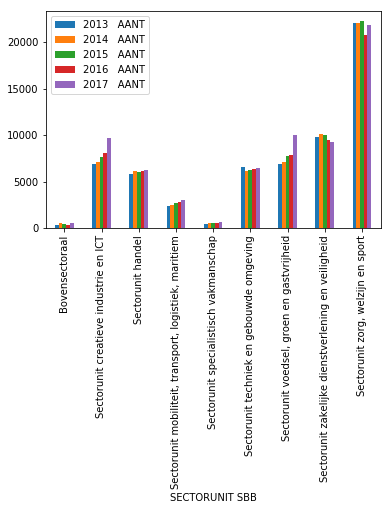

In [10]:
(rein)
%config IPCompleter.greedy = True  
%matplotlib inline
df_totaalSBB.plot.bar()

Bron voor onderstaande: https://hub.mybinder.org/user/bokeh-bokeh-notebooks-yecjmjgh/notebooks/tutorial/07%20-%20Bar%20and%20Categorical%20Data%20Plots.ipynb

# 4. Visualiseer hoe vaak een bepaald type mbo niveau 4 gediplomeerden voorkomt in het wervingsgebied van de Windesheim locatie Zwolle in absolute aantallen

Wederom in stappen. 
- Hieronder worden de totale uitsroom MBO4 gediplomeerde in het wervingsgebied Zwolle per jaar gevisualiseerd
- Onder 4.1 een landelijke top tien naar MBO opleiding per jaar
- Onder 4.2 de top tien naar MBO opleiding per jaar in het wervingsgebied Zwolle
- In stap vijf doen we hetzelfde voor Flevoland. 

In [11]:
#dataframe om alle gediplomeerden in regio Zwolle te selecteren
df_locatie_zwolle = df.loc[df['Locatie'] == 'Zwolle']
df_aantal_zwolle = df_locatie_zwolle.groupby(['Locatie']).sum()[['2013   AANT','2014   AANT','2015   AANT','2016   AANT','2017   AANT']]

In [12]:
df_aantal_zwolle.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Zwolle to Zwolle
Data columns (total 5 columns):
2013   AANT    1 non-null int64
2014   AANT    1 non-null int64
2015   AANT    1 non-null int64
2016   AANT    1 non-null int64
2017   AANT    1 non-null int64
dtypes: int64(5)
memory usage: 48.0+ bytes


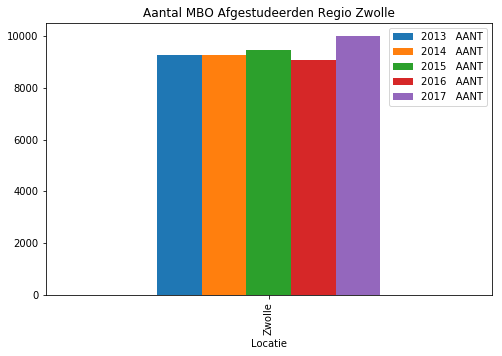

In [13]:
df_aantal_zwolle.plot.bar(figsize=(8,5.0),title='Aantal MBO Afgestudeerden Regio Zwolle')

In [14]:
df_locatie_zwolle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24228 entries, 63982 to 162220
Data columns (total 16 columns):
nr                    24228 non-null int64
PC4_LEERL             24228 non-null int64
KWALIFICATIENIVEAU    24228 non-null int64
KWALIFICATIE CODE     24228 non-null int64
KWALIFICATIE NAAM     24228 non-null object
MBO SECTOR            24228 non-null object
DOMEIN                24228 non-null object
SECTORUNIT SBB        24228 non-null object
GESLACHT              24228 non-null object
2013   AANT           24228 non-null int64
2014   AANT           24228 non-null int64
2015   AANT           24228 non-null int64
2016   AANT           24228 non-null int64
2017   AANT           24228 non-null int64
Locatie               24228 non-null object
Categorie             24228 non-null object
dtypes: int64(9), object(7)
memory usage: 3.1+ MB


# 4.1 Visualisatie meest behaalde diploma's naar mbo4 opleiding landelijk 

Dit zijn de meest behaalde MBO 4 diploma's naar mbo opleiding (kwalificatie_naam) landelijk, per jaar.

In [15]:
# Zorg ervoor dat de kwalificatie naam uniek wordt weergegeven
df['KWALIFICATIE NAAM'].unique()

array(['Horeca-ondernemer/-manager', 'Restauratiemedewerker',
       'Artiest (Muziek)', 'Ondernemer detailhandel',
       'Ondernemer horeca/bakkerij (Manager/ondernemer caf?-bar)',
       'Ondernemer horeca/bakkerij (Manager/ondernemer horeca)',
       'Mediavormgever (Animatie/audiovisuele vormgeving)',
       'Mediavormgever (Art & Design KC GOC)',
       'Mediavormgever (Grafische vormgeving)',
       'Mediavormgever (Interactieve vormgeving)',
       'Medewerker marketing en communicatie (Assistent communicatiemedewerker)',
       'Medewerker marketing en communicatie (Marketing medewerker)',
       'Medewerker marketing en communicatie (Medewerker evenementenorganisatie)',
       'Assistent-manager internationale handel (Assistent-manager internationale handel buitendienst)',
       'Interieuradviseur', 'Apothekersassistent', 'Doktersassistent',
       'Sociaal-cultureel werker',
       'Sport en bewegen (Sport- en bewegingsco?rdinator / Bewegingsagoog)',
       'Tandartsassiste

In [16]:
# Creeer dataframe met daarin het aantal behaalde diploma's per kwalificatie
df_totaalKN = df.groupby(['KWALIFICATIE NAAM']).sum()[['2013   AANT','2014   AANT','2015   AANT','2016   AANT','2017   AANT']]
df_totaalKN.head()

,2013 AANT,2014 AANT,2015 AANT,2016 AANT,2017 AANT
KWALIFICATIE NAAM,,,,,
(Junior) accountmanager,0,0,0,0,3
AV-productie,17,0,0,0,0
AV-productie (Beeldtechnicus),16,10,3,1,0
AV-productie (Cameraman),129,144,143,17,1
AV-productie (Fotograaf),196,172,199,164,192


In [17]:
# Top 10 meest behaalde diploma's jaar 2017 - Landelijk

df_landelijk = df.groupby(['KWALIFICATIE NAAM','MBO SECTOR']).sum()[['2013   AANT','2014   AANT','2015   AANT','2016   AANT','2017   AANT']]
df_landelijk = df_landelijk.sort_values(by='2017   AANT', ascending=False)
# Laat de (10) meest voorkomende diploma's van 2017 zien
df_landelijk10 = df_landelijk.nlargest(10, '2017   AANT')
df_landelijk10

,,2013 AANT,2014 AANT,2015 AANT,2016 AANT,2017 AANT
KWALIFICATIE NAAM,MBO SECTOR,,,,,
Mbo-Verpleegkundige,zorg en welzijn,205,1011,2644,4191,5064
Onderwijsassistent,zorg en welzijn,3205,3096,2660,2604,2647
Maatschappelijke Zorg (Persoonlijk begeleider specifieke doelgroepen),zorg en welzijn,1418,1636,2078,2068,2412
Financi?le beroepen (Bedrijfsadministrateur),economie,2071,2371,2451,2393,2304
Manager handel (Filiaalmanager),economie,1917,2174,2067,2020,2220
Middenkader engineering (Technicus),techniek,1841,1929,1933,2018,2035
Maatschappelijke Zorg (Persoonlijk begeleider gehandicaptenzorg),zorg en welzijn,2288,2320,2419,1925,1833
ICT- en mediabeheer (ICT-beheerder),economie,327,502,989,1312,1830
Gespecialiseerd Pedagogisch medewerker 4 kinderopvang,zorg en welzijn,2473,2415,2215,1705,1751


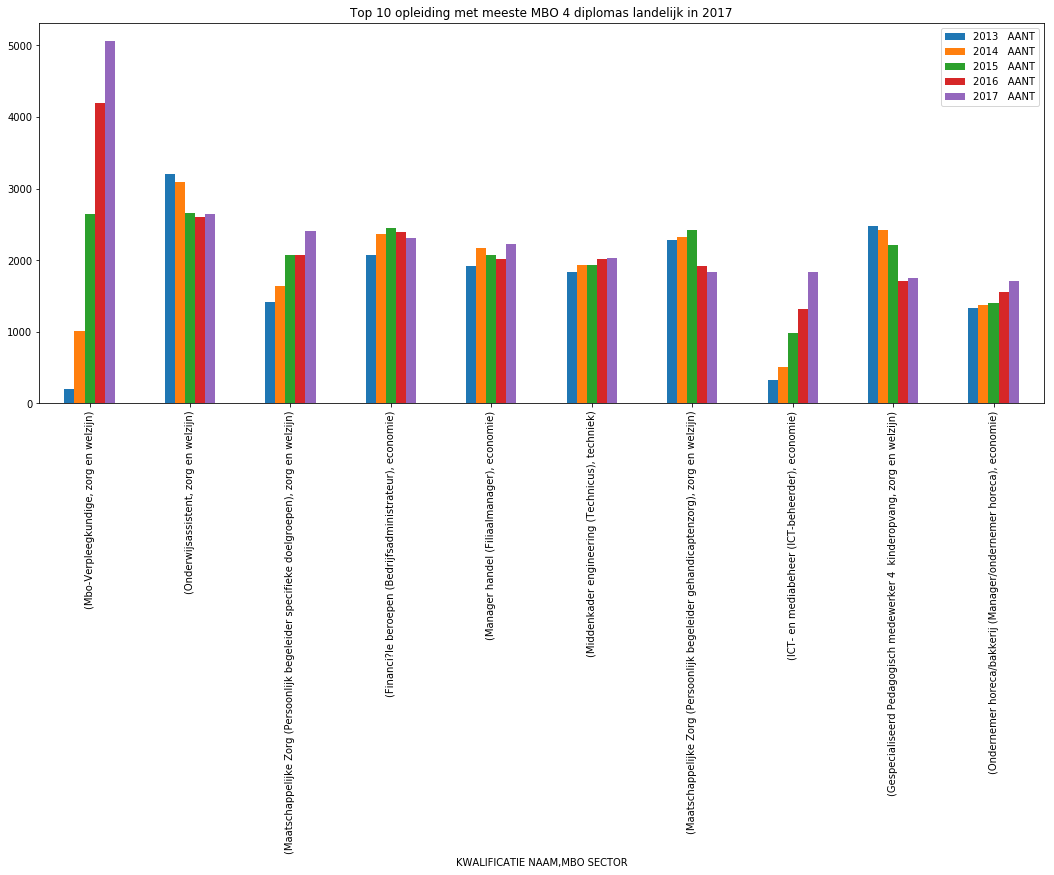

In [18]:
df_landelijk10.plot.bar(figsize=(18,7.0),title='Top 10 opleiding met meeste MBO 4 diplomas landelijk in 2017')

# 4.2 Visualisatie naar mbo4 opleiding per jaar, wervingsgebied Zwolle

Hieronder zijn de meest behaalde MBO 4 diploma's naar mbo opleiding (kwalificatie naam) binnen het wervingsgebied Zwolle.

In [19]:
# Top 10 meest behaalde diploma's jaar 2017 - Wervingsgebied Zwolle

df_zwolle = df
df_zwolle = df_zwolle.loc[df_zwolle['Locatie'] == 'Zwolle']
df_zwolle = df_zwolle.groupby(['KWALIFICATIE NAAM','MBO SECTOR']).sum()[['2013   AANT','2014   AANT','2015   AANT','2016   AANT','2017   AANT']]
df_zwolle = df_zwolle.sort_values(by='2017   AANT', ascending=False)
# Laat de (10) meest voorkomende diploma's zien van 2017
df_zwolle10 = df_zwolle.nlargest(10, '2017   AANT')
df_zwolle10

# Opleiding Mbo-Verpleegkundige lijkt enorm gegroeid te zijn, maar werd eerder als MBO-verpleegkundige omschreven.

,,2013 AANT,2014 AANT,2015 AANT,2016 AANT,2017 AANT
KWALIFICATIE NAAM,MBO SECTOR,,,,,
Mbo-Verpleegkundige,zorg en welzijn,81,240,594,804,935
Maatschappelijke Zorg (Persoonlijk begeleider specifieke doelgroepen),zorg en welzijn,261,298,414,363,454
Onderwijsassistent,zorg en welzijn,553,496,444,436,445
Maatschappelijke Zorg (Persoonlijk begeleider gehandicaptenzorg),zorg en welzijn,485,458,492,414,369
Manager handel (Filiaalmanager),economie,338,325,331,313,359
Middenkader engineering (Technicus),techniek,292,293,326,312,330
Financi?le beroepen (Bedrijfsadministrateur),economie,323,306,319,348,301
Gespecialiseerd Pedagogisch medewerker 4 kinderopvang,zorg en welzijn,358,307,278,256,285
Secretariele beroepen (Directiesecretaresse/managementassistent),economie,114,212,228,262,242


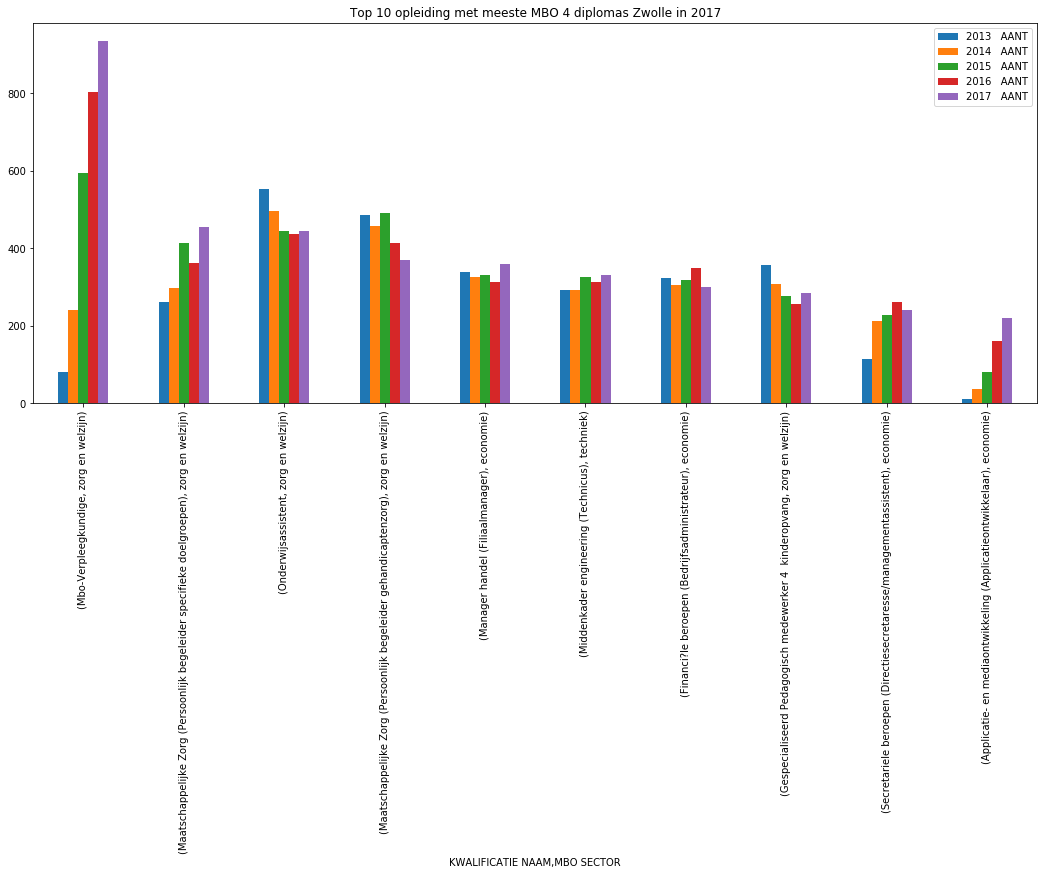

In [20]:
df_zwolle10.plot.bar(figsize=(18,7.0),title='Top 10 opleiding met meeste MBO 4 diplomas Zwolle in 2017')

# 5. Visualiseer hoe vaak een bepaald type mbo niveau 4 gediplomeerden voorkomt in het wervingsgebied van de Windesheim locatie Flevoland in absolute aantallen

Deze visualisatie staat gelijk aan wat er hierboven gebeurd. Alleen dan wordt het hier gedaan voor de locatie Flevoland.

In [21]:
#dataframe om alle gediplomeerden in regio Flevoland te selecteren
df_locatie_flevoland = df.loc[df['Locatie'] == 'Flevoland']
df_aantal_flevoland = df_locatie_flevoland.groupby(['Locatie']).sum()[['2013   AANT','2014   AANT','2015   AANT','2016   AANT','2017   AANT']]

In [22]:
df_aantal_flevoland

,2013 AANT,2014 AANT,2015 AANT,2016 AANT,2017 AANT
Locatie,,,,,
Flevoland,6713,7032,6556,6631,6821


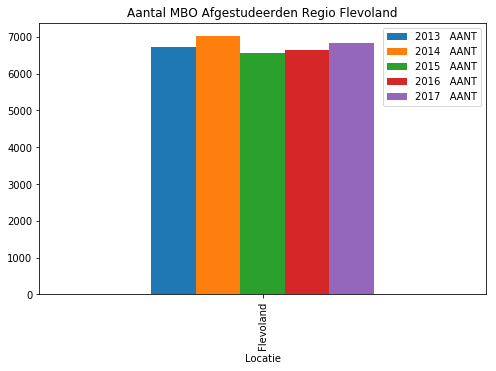

In [23]:
df_aantal_flevoland.plot.bar(figsize=(8,5.0),title='Aantal MBO Afgestudeerden Regio Flevoland')

# 5.1 Visualisatie naar mbo4 opleiding per jaar, wervingsgebied Zwolle

Visualiseer de meest behaalde MBO 4 diploma's (kwalificatie naam) binnen het wervingsgebied Flevoland.

In [24]:
# Top 10 meest behaalde diploma's jaar 2017 - Wervingsgebied Flevoland

df_flevoland = df
df_flevoland = df_flevoland.loc[df_flevoland['Locatie'] == 'Flevoland']
df_flevoland = df_flevoland.groupby(['KWALIFICATIE NAAM','MBO SECTOR']).sum()[['2013   AANT','2014   AANT','2015   AANT','2016   AANT','2017   AANT']]
df_flevoland = df_flevoland.sort_values(by='2017   AANT', ascending=False)
# Laat de (10) meest voorkomende diploma's van 2017 zien
df_flevoland10 = df_flevoland.nlargest(10, '2017   AANT')
df_flevoland10

# Opleiding Mbo-Verpleegkundige lijkt enorm gegroeid te zijn, maar werd eerder als MBO-verpleegkundige omschreven.

,,2013 AANT,2014 AANT,2015 AANT,2016 AANT,2017 AANT
KWALIFICATIE NAAM,MBO SECTOR,,,,,
Mbo-Verpleegkundige,zorg en welzijn,36,133,227,304,350
Financi?le beroepen (Bedrijfsadministrateur),economie,313,421,317,313,310
Juridisch medewerker zakelijke dienstverlening,economie,284,304,295,279,305
Manager handel (Filiaalmanager),economie,237,247,237,303,300
Ondernemer horeca/bakkerij (Manager/ondernemer horeca),economie,198,194,204,234,252
ICT- en mediabeheer (ICT-beheerder),economie,56,106,128,172,229
Medewerker marketing en communicatie (Marketing medewerker),economie,308,319,318,298,219
Onderwijsassistent,zorg en welzijn,274,265,283,203,218
Gespecialiseerd Pedagogisch medewerker 4 kinderopvang,zorg en welzijn,354,367,265,225,200


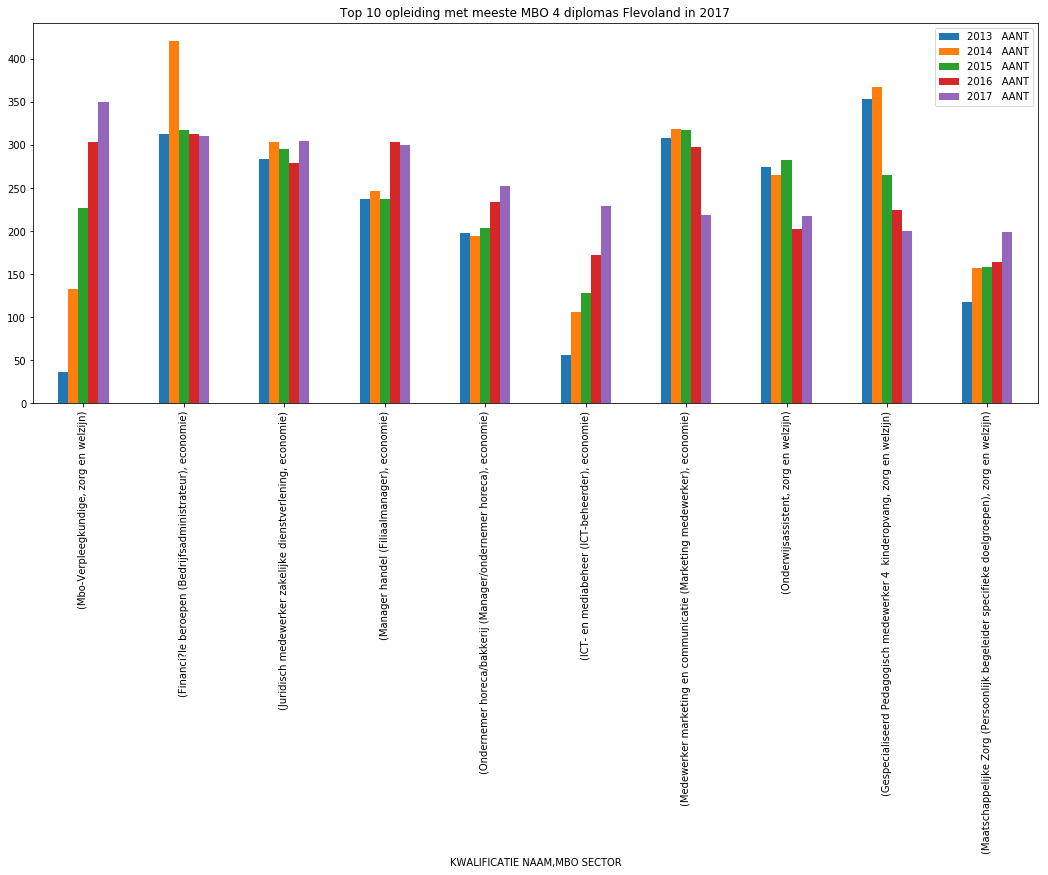

In [25]:
df_flevoland10.plot.bar(figsize=(18,7.0),title='Top 10 opleiding met meeste MBO 4 diplomas Flevoland in 2017')

# 5.2 Exploratie output tussen de gebieden landelijk, Zwolle en Flevoland

Hieronder wordt de data landelijk en per locatie (Zwolle en Flevoland) verkend. Een eerste data verkenning van enkele statistische gegevens.

In [26]:
print(df_landelijk.shape)
df_landelijk.describe()

(425, 5)


,2013 AANT,2014 AANT,2015 AANT,2016 AANT,2017 AANT
count,425.000000,425.000000,425.000000,425.000000,425.000000
mean,143.724706,146.543529,149.912941,146.562353,159.611765
std,368.280703,388.305230,389.765077,404.609335,443.889873
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,0.000000,0.000000,0.000000
50%,20.000000,13.000000,8.000000,7.000000,4.000000
75%,90.000000,99.000000,98.000000,81.000000,93.000000
max,3205.000000,3096.000000,2660.000000,4191.000000,5064.000000


In [27]:
print(df_zwolle.shape)
df_zwolle.describe()

(325, 5)


,2013 AANT,2014 AANT,2015 AANT,2016 AANT,2017 AANT
count,325.000000,325.000000,325.000000,325.000000,325.000000
mean,28.566154,28.575385,29.110769,27.947692,30.778462
std,71.122999,69.405665,73.301087,76.260561,82.903075
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2.000000,2.000000,2.000000,1.000000
75%,19.000000,19.000000,21.000000,16.000000,20.000000
max,553.000000,496.000000,594.000000,804.000000,935.000000


In [28]:
print(df_flevoland.shape)
df_flevoland.describe()

(304, 5)


,2013 AANT,2014 AANT,2015 AANT,2016 AANT,2017 AANT
count,304.000000,304.000000,304.000000,304.000000,304.000000
mean,22.082237,23.131579,21.565789,21.812500,22.437500
std,52.569393,56.218713,51.060654,51.379206,52.634452
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2.000000,2.000000,2.000000,2.000000
75%,15.250000,16.000000,14.000000,14.000000,16.250000
max,354.000000,421.000000,318.000000,313.000000,350.000000


# 6. Visualiseer waar de gediplomeerde mbo-4 woonachtig zijn naar mbo-opleiding in absolute aantallen

Hieronder wordt de data samengevoegd met de koppeltabel gegevens. Dit om bijvoorbeeld de woonplaats en provincie te kunnen koppelen aan de postcode. Dit vormt een basis voor de verdere visualisatie.

In [44]:
koppeltabel = pd.read_sql_query("SELECT * FROM koppeltabel",engine)

In [45]:
renamed = datasource.rename(columns={'PC4_LEERL': 'PC4'})
output = pd.merge(renamed, koppeltabel, on='PC4', how='inner')
output.head(10)

,nr,PC4,KWALIFICATIENIVEAU,KWALIFICATIE CODE,KWALIFICATIE NAAM,MBO SECTOR,DOMEIN,SECTORUNIT SBB,GESLACHT,2013 AANT,...,Locatie,Categorie,Woonplaatscode,Woonplaats,Gemeentecode,Gemeente,Provincie,Veiligheidsregio,Politie-eenheid,Omgevingsdienst
0,1424,1011,4,10388,Horeca-ondernemer/-manager,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",M,1,...,Flevoland,Aangrenzend Primair,3594,Amsterdam,363,Amsterdam,Noord-Holland,Amsterdam-Amstelland,Amsterdam,Noordzeekanaalgebied
1,1425,1011,4,10801,Restauratiemedewerker,techniek,Bouw en infra,Sectorunit techniek en gebouwde omgeving,M,1,...,Flevoland,Aangrenzend Primair,3594,Amsterdam,363,Amsterdam,Noord-Holland,Amsterdam-Amstelland,Amsterdam,Noordzeekanaalgebied
2,1426,1011,4,90038,Artiest (Muziek),techniek,Zorg en welzijn,Sectorunit creatieve industrie en ICT,M,0,...,Flevoland,Aangrenzend Primair,3594,Amsterdam,363,Amsterdam,Noord-Holland,Amsterdam-Amstelland,Amsterdam,Noordzeekanaalgebied
3,1427,1011,4,90290,Ondernemer detailhandel,economie,Handel en ondernemerschap,Sectorunit handel,M,1,...,Flevoland,Aangrenzend Primair,3594,Amsterdam,363,Amsterdam,Noord-Holland,Amsterdam-Amstelland,Amsterdam,Noordzeekanaalgebied
4,1428,1011,4,90301,Ondernemer horeca/bakkerij (Manager/ondernemer...,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",M,0,...,Flevoland,Aangrenzend Primair,3594,Amsterdam,363,Amsterdam,Noord-Holland,Amsterdam-Amstelland,Amsterdam,Noordzeekanaalgebied
5,1429,1011,4,90301,Ondernemer horeca/bakkerij (Manager/ondernemer...,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",V,0,...,Flevoland,Aangrenzend Primair,3594,Amsterdam,363,Amsterdam,Noord-Holland,Amsterdam-Amstelland,Amsterdam,Noordzeekanaalgebied
6,1430,1011,4,90303,Ondernemer horeca/bakkerij (Manager/ondernemer...,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",M,0,...,Flevoland,Aangrenzend Primair,3594,Amsterdam,363,Amsterdam,Noord-Holland,Amsterdam-Amstelland,Amsterdam,Noordzeekanaalgebied
7,1431,1011,4,90303,Ondernemer horeca/bakkerij (Manager/ondernemer...,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",V,1,...,Flevoland,Aangrenzend Primair,3594,Amsterdam,363,Amsterdam,Noord-Holland,Amsterdam-Amstelland,Amsterdam,Noordzeekanaalgebied
8,1432,1011,4,90411,Mediavormgever (Animatie/audiovisuele vormgeving),techniek,Media en vormgeving,Sectorunit creatieve industrie en ICT,M,0,...,Flevoland,Aangrenzend Primair,3594,Amsterdam,363,Amsterdam,Noord-Holland,Amsterdam-Amstelland,Amsterdam,Noordzeekanaalgebied
9,1433,1011,4,90412,Mediavormgever (Art & Design KC GOC),techniek,Media en vormgeving,Sectorunit creatieve industrie en ICT,V,1,...,Flevoland,Aangrenzend Primair,3594,Amsterdam,363,Amsterdam,Noord-Holland,Amsterdam-Amstelland,Amsterdam,Noordzeekanaalgebied


# 6.1. Visualisatie per Provincie

Hieronder wordt de totalen gediplomeerden MBO4 per jaar opgeteld en gegroepeerd naar provincie.

In [46]:
#dataframe om alle gediplomeerden per provincie te selecteren
df_totaalprovincie = output.groupby(['Provincie']).sum()[['2013   AANT','2014   AANT','2015   AANT','2016   AANT','2017   AANT']]
df_totaalprovincie

,2013 AANT,2014 AANT,2015 AANT,2016 AANT,2017 AANT
Provincie,,,,,
Drenthe,2160,2144,2266,2078,2497
Flevoland,1901,1809,1834,1768,1952
Friesland,3081,3100,3297,3207,3501
Gelderland,8350,8354,8471,8374,9259
Groningen,2209,2314,2507,2588,2998
Limburg,3995,4297,4217,3948,4671
Noord-Brabant,9538,9971,10286,10270,11357
Noord-Holland,9098,9491,9432,9144,9686
Overijssel,5353,5605,5681,5555,5804


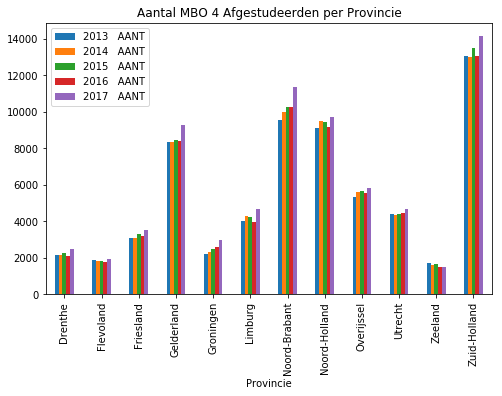

In [47]:
df_totaalprovincie.plot.bar(figsize=(8,5.0),title='Aantal MBO 4 Afgestudeerden per Provincie')

# 6.2. Visualisatie per Categorie

Hieronder wordt de totalen gediplomeerden MBO4 per jaar opgeteld en gegroepeerd naar provincie. Wij verstaan onder categorie het wervingsgebied.

In [48]:
#dataframe om alle gediplomeerden per categorie te selecteren
df_totaalcategorie = output.groupby(['Categorie']).sum()[['2013   AANT','2014   AANT','2015   AANT','2016   AANT','2017   AANT']]
df_totaalcategorie

,2013 AANT,2014 AANT,2015 AANT,2016 AANT,2017 AANT
Categorie,,,,,
,47864,48768,50547,49320,54219
Aangrenzend Primair,9702,9985,9577,9521,10024
Aangrenzend Secundair,3159,3259,3330,3146,3631
Thuismarkt,4127,4055,4066,3975,4218


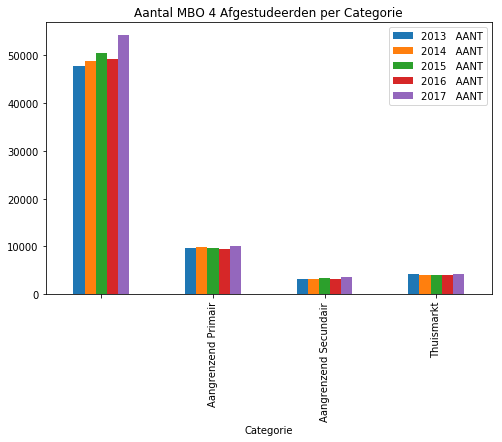

In [49]:
df_totaalcategorie.plot.bar(figsize=(8,5.0),title='Aantal MBO 4 Afgestudeerden per Categorie')

# 6.2. Visualisatie "Thuismarkt"

Hieronder wordt de totalen gediplomeerden MBO4 per jaar opgeteld en gegroepeerd naar provincie. Wij verstaan onder categorie het wervingsgebied. Wij kijken hier naar de gemeentes die bij het wervingsgebied thuismarkt horen en tellen hier de aantallen op.

In [50]:
#dataframe om alle gediplomeerden in Categorie "Thuismarkt" te selecteren
df_thuismarkt = output.loc[output['Categorie'] == 'Thuismarkt']
df_gt = df_thuismarkt.groupby(['Gemeente']).sum()[['2013   AANT','2014   AANT','2015   AANT','2016   AANT','2017   AANT']]
df_gt

,2013 AANT,2014 AANT,2015 AANT,2016 AANT,2017 AANT
Gemeente,,,,,
Almere,954,936,896,854,982
Dalfsen,39,38,34,37,24
De Wolden,60,57,53,55,64
Dronten,187,174,215,207,228
Elburg,90,94,92,95,113
Epe,115,134,110,115,139
Groningen,9,7,5,8,7
Hattem,44,44,46,37,45
Heerde,102,108,94,103,109


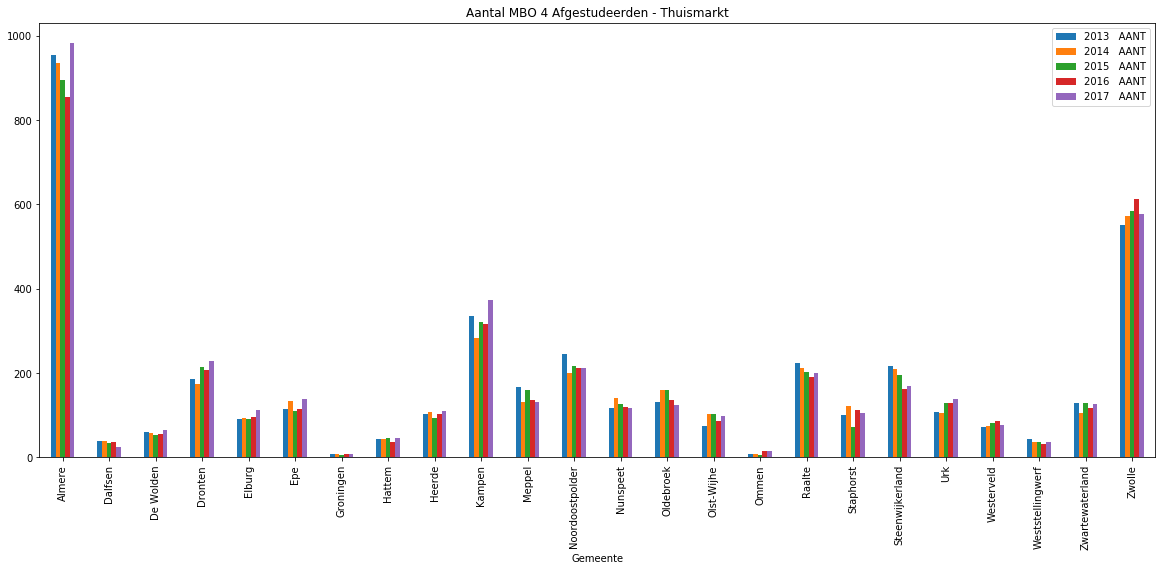

In [51]:
df_gt.plot.bar(figsize=(20,8.0),title='Aantal MBO 4 Afgestudeerden - Thuismarkt')

# 6.3. Visualisatie "Aangrenzend Primair"

Hieronder wordt de totalen gediplomeerden MBO4 per jaar opgeteld en gegroepeerd naar provincie. Wij verstaan onder categorie het wervingsgebied. Wij kijken hier naar de gemeentes die bij het wervingsgebied aangrenzend primair horen en tellen hier de aantallen op.

In [52]:
#dataframe om alle gediplomeerden in Categorie "Aangrenzend Primair" te selecteren
df_ap = output.loc[output['Categorie'] == 'Aangrenzend Primair']
df_gap = df_ap.groupby(['Gemeente']).sum()[['2013   AANT','2014   AANT','2015   AANT','2016   AANT','2017   AANT']]
df_gap

,2013 AANT,2014 AANT,2015 AANT,2016 AANT,2017 AANT
Gemeente,,,,,
Aalsmeer,103,113,113,104,112
Alkmaar,22,27,34,22,26
Amersfoort,580,600,578,617,590
Amsterdam,2106,2316,2081,2203,2081
Apeldoorn,597,626,650,620,667
Baarn,86,77,63,59,76
Barneveld,327,313,263,318,284
Beemster,50,30,38,43,36
Blaricum,20,21,17,15,26


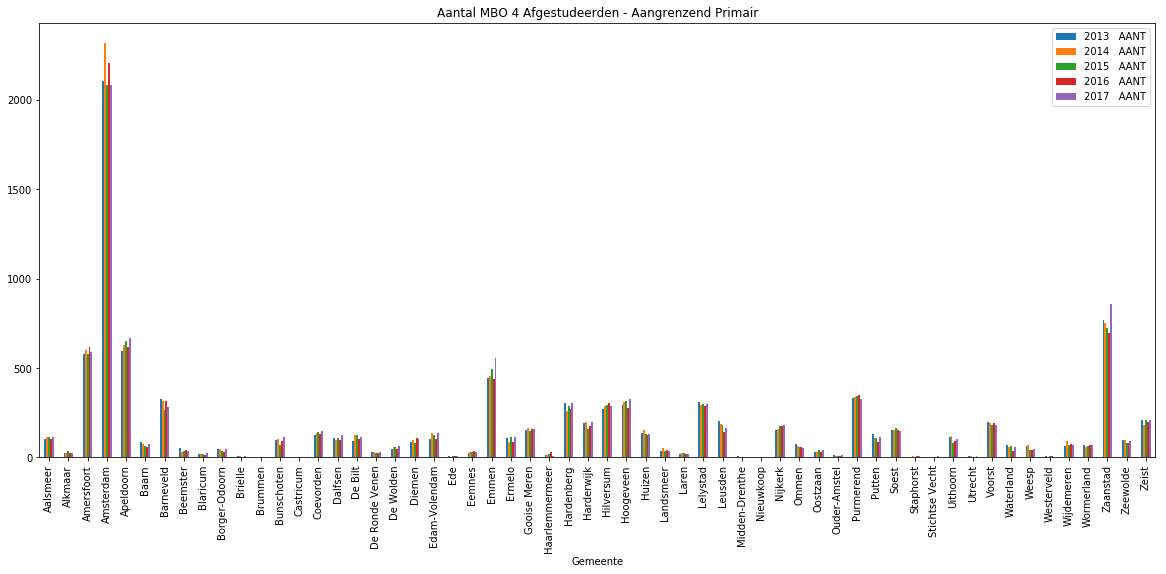

In [53]:
df_gap.plot.bar(figsize=(20,8.0),title='Aantal MBO 4 Afgestudeerden - Aangrenzend Primair')

# 6.4. Visualisatie "Aangrenzend Secundair"

Hieronder wordt de totalen gediplomeerden MBO4 per jaar opgeteld en gegroepeerd naar provincie. Wij verstaan onder categorie het wervingsgebied. Wij kijken hier naar de gemeentes die bij het wervingsgebied aangrenzend secundair horen en tellen hier de aantallen op.

In [54]:
#dataframe om alle gediplomeerden in Categorie "Aangrenzend Secundair" te selecteren
df_as = output.loc[output['Categorie'] == 'Aangrenzend Secundair']
df_gas = df_as.groupby(['Gemeente']).sum()[['2013   AANT','2014   AANT','2015   AANT','2016   AANT','2017   AANT']]
df_gas

,2013 AANT,2014 AANT,2015 AANT,2016 AANT,2017 AANT
Gemeente,,,,,
Aa en Hunze,74,55,71,68,80
Almelo,272,334,323,312,329
Assen,333,280,291,335,382
Borne,109,144,116,107,120
De Fryske Marren,32,35,16,21,41
Deventer,364,373,407,382,375
Dinkelland,39,40,34,48,38
Haaksbergen,115,84,121,113,134
Hardenberg,53,62,68,51,69


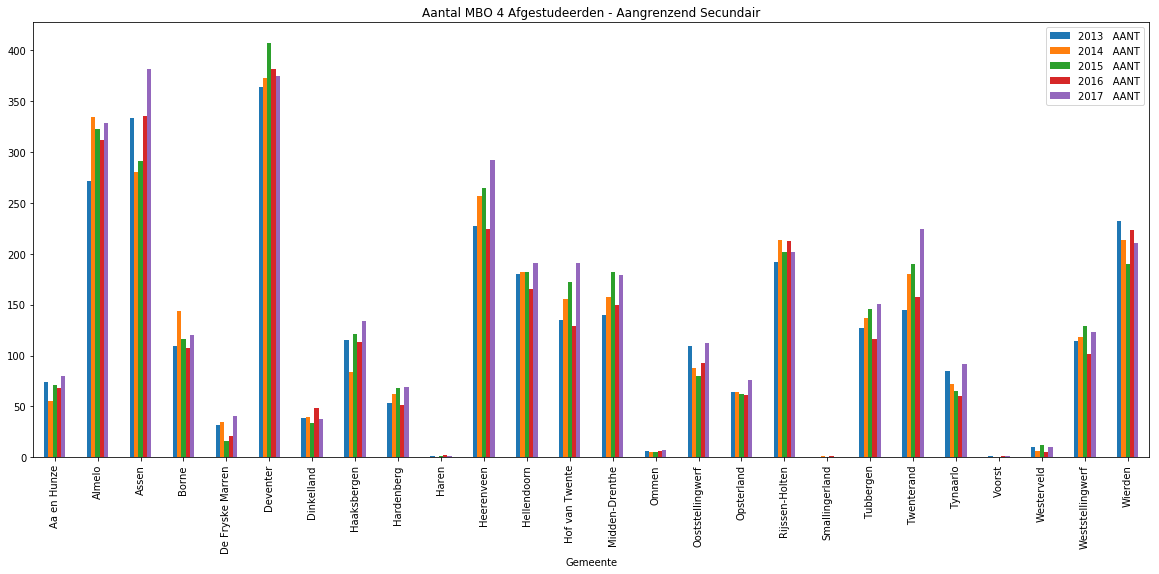

In [55]:
df_gas.plot.bar(figsize=(20,8.0),title='Aantal MBO 4 Afgestudeerden - Aangrenzend Secundair')

# 6.5. Visualisatie "Meerdere"

Hieronder wordt de totalen gediplomeerden MBO4 per jaar opgeteld en gegroepeerd naar provincie. Wij verstaan onder categorie het wervingsgebied. Wij kijken hier naar de gemeentes die bij het wervingsgebied meerdere horen en tellen hier de aantallen op.

In [67]:
#dataframe om alle gediplomeerden in Categorie "Meerdere" te selecteren
df_me = output.loc[output['Categorie'] == 'Meerdere']
df_gme = df_me.groupby(['Gemeente']).sum()[['2013   AANT','2014   AANT','2015   AANT','2016   AANT','2017   AANT']]
df_gme

,2013 AANT,2014 AANT,2015 AANT,2016 AANT,2017 AANT
Gemeente,,,,,


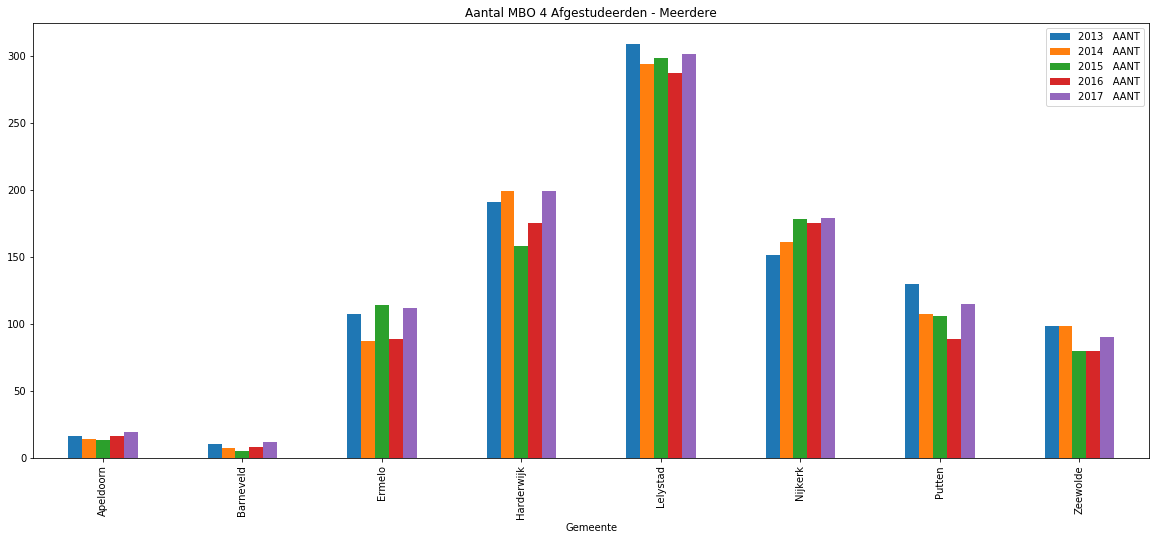

In [55]:
df_gme.plot.bar(figsize=(20,8.0),title='Aantal MBO 4 Afgestudeerden - Meerdere')

# 7. Visualisatie "MBO Sector" in absolute aantallen

Hieronder de aantallen gegroepeerd naar mbo-sector (macro-economische indeling).

In [59]:
df_sector = df.groupby(['MBO SECTOR']).sum()[['2013   AANT','2014   AANT','2015   AANT','2016   AANT','2017   AANT']]
df_sector

,2013 AANT,2014 AANT,2015 AANT,2016 AANT,2017 AANT
MBO SECTOR,,,,,
combinatie van sectoren,4,2,0,0,0
economie,21757,22626,22828,22941,24777
groen,2658,2703,2987,2761,4167
techniek,14563,14782,15488,15668,16847
zorg en welzijn,22101,22168,22410,20919,22044


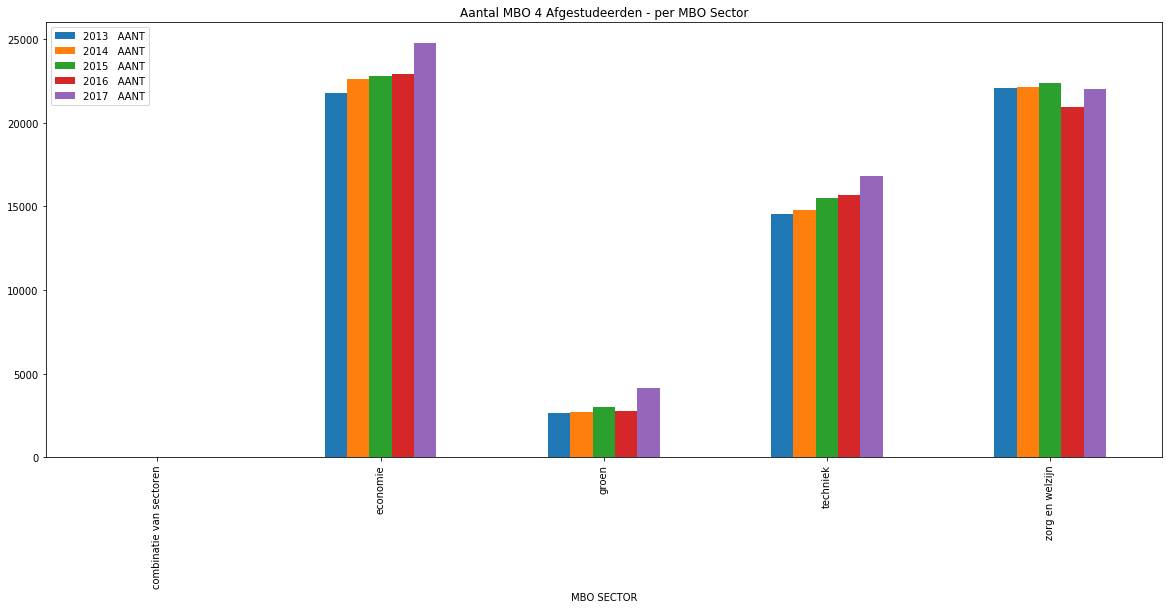

In [60]:
df_sector.plot.bar(figsize=(20,8.0),title='Aantal MBO 4 Afgestudeerden - per MBO Sector')